The dataset provided is a one and half years of representative customer's data from Santander bank spanning 2015-01-28 to 2016-06-28. 

The goal is to determine what 
i) Segment customers belong to
ii) products NEW customers will get from the bank in the period 2016-05-28 to 2016-06-28. 

#### Let us first load the modules and data required to understand the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'bankMadridNew.csv', low_memory=False )
print("Dimensions of the dataset" , df.shape)

Dimensions of the dataset (190455, 48)


The columns are in Spanish we will rename columns for ease of understanding.

In [2]:
df.columns = ['Partition_id','customer_code','employee_index','customer_residence','customer_gender','customer_age','first_contract_date','new_customer_index','customer_seniority','customer_type','last_date_as_primary_customer','customer_type_month_beg','customer_relation_type','residence_index','foreigner_index','spouse_index','channel_used','deceased_index','address_type','province_code','province_name','activity_type','gross_income','segmentation','saving_Account','guarantees','current_Accounts','derivative_account','payroll_Account','junior_Account','joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term','e_account','Funds','Mortgage','Pensions','Loans','Taxes','credit_Card','securities','home_Account','payroll','Pensions_2','direct_Debit']
df.head()

,Partition_id,customer_code,employee_index,customer_residence,customer_gender,customer_age,first_contract_date,new_customer_index,customer_seniority,customer_type,...,Mortgage,Pensions,Loans,Taxes,credit_Card,securities,home_Account,payroll,Pensions_2,direct_Debit
0,2015-01-28,1042509,N,ES,V,20,2012-08-03,1.0,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1014660,N,ES,H,32,2012-05-07,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1132935,N,ES,V,38,2013-05-03,1.0,2,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0
3,2015-01-28,1110925,N,ES,V,29,2012-12-10,1.0,5,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1118340,N,ES,V,31,2013-01-17,1.0,3,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0


### Missing Values check
The number of rows is quite large around 190k. We will assess if there are missing values and if they can be removed. 

In [3]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,column_name,missing_count
4,customer_gender,12
45,payroll,41
46,Pensions_2,41
11,customer_type_month_beg,27711
12,customer_relation_type,27711
23,segmentation,31507
16,channel_used,31599
22,gross_income,132357
10,last_date_as_primary_customer,187746
15,spouse_index,190391


#### Remove rows with null values 
Based on the values above, we remove rows where gross_income, channel_used, segmentation, customer_relation_type, customer_type_month_beg, pensions_2 and customer_gender is null. Living and local customers will be included in our analysis.

In [4]:
dMadridNewCustomer = df[~df['gross_income'].isnull()] #Only rows where there is gross income
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['channel_used'].isnull()] #Only rows where there is channel used
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['segmentation'].isnull()] #Only rows where there is segementation data
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_relation_type'].isnull()] # Only accounts with customer_relation_type data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_type_month_beg'].isnull()] # Only accounts with customer_type_month_beg data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['payroll'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['Pensions_2'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_gender'].isnull()] #Only rows where there is segementation data

# Only Living customers
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['deceased_index'] == 'N']
# Only locals
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['foreigner_index'] == 'N']
dMadridNewCustomer.shape

(47968, 48)

## Remove data where is no value in the following columns
These columns indicate all the available accounts to the customer. 

In [5]:
dMadridNewCustomer = dMadridNewCustomer[~((dMadridNewCustomer['current_Accounts']==0) & (dMadridNewCustomer['derivative_account']==0) 
                    & (dMadridNewCustomer['payroll_Account']==0) & (dMadridNewCustomer['junior_Account']==0)
                    & (dMadridNewCustomer['joint_account']==0) & (dMadridNewCustomer['individual_Account']==0)
                    & (dMadridNewCustomer['individual_Plus']==0) & (dMadridNewCustomer['short_term']==0)
                    & (dMadridNewCustomer['medium_term']==0) & (dMadridNewCustomer['long_term']==0)
                    & (dMadridNewCustomer['e_account']==0) & (dMadridNewCustomer['Funds']==0)
                    & (dMadridNewCustomer['Mortgage']==0) & (dMadridNewCustomer['Pensions']==0)
                    & (dMadridNewCustomer['Taxes']==0) & (dMadridNewCustomer['credit_Card']==0)
                    & (dMadridNewCustomer['securities']==0) & (dMadridNewCustomer['payroll']==0)
                    & (dMadridNewCustomer['Pensions_2']==0) & (dMadridNewCustomer['direct_Debit']==0))
                   ]

#### Get an understanding of the data types

In [6]:
dtype_df = dMadridNewCustomer.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,25
1,float64,8
2,object,15


#### Integer Columns Analysis

In [7]:
unique_values_dict = {}
for col in dMadridNewCustomer.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'float64']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ", unique_val)
    print("--------------------------------------------------")
# customer_gender varón o hembra

Column: ['new_customer_index', 'address_type']  containing the unique values :  [1.0]
--------------------------------------------------
Column: ['customer_type']  containing the unique values :  [1.0, 99.0]
--------------------------------------------------
Column: ['province_code']  containing the unique values :  [28.0]
--------------------------------------------------
Column: ['activity_type']  containing the unique values :  [1.0, 0.0]
--------------------------------------------------
Column: ['gross_income']  containing the unique values :  [115323.6, 132283.65000000002, 93989.46, 79421.1, 72791.25, 306586.80000000005, 161914.65000000002, 142223.79, 203739.0, 58614.87, 247303.83, 125032.17, 86040.66, 127394.19, 498513.99, 80464.08, 241293.0, 243759.6, 174358.71, 122723.04, 192480.27, 411648.72, 71454.95999999999, 41169.66, 121820.07, 227501.19, 83725.77, 58472.91, 109380.38999999998, 172016.82, 105360.36000000002, 125420.13, 360318.09, 94448.64, 127310.97, 136813.77, 201225.3, 

There are columns with one unique value, we can exclude from our modeling step. province_code, new_customer_index, address_type

In [9]:
dAnalysis = dMadridNewCustomer.drop(['new_customer_index','address_type', 'province_code'], 1) 

#### Categorical Columns Analysis

In [10]:
unique_values_dict = {}
for col in dAnalysis.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ",unique_val)
    print("--------------------------------------------------")

Column: ['Partition_id']  containing the unique values :  ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
--------------------------------------------------
Column: ['employee_index', 'foreigner_index', 'deceased_index']  containing the unique values :  ['N']
--------------------------------------------------
Column: ['customer_residence']  containing the unique values :  ['ES']
--------------------------------------------------
Column: ['customer_gender']  containing the unique values :  ['V', 'H']
--------------------------------------------------
Column: ['first_contract_date']  containing the unique values :  ['2012-08-03', '2012-05-07', '2012-12-10', '2010-07-13', '2014-06-27', '2014-04-10', '2014-12-04', '2014-10-23', '2014-10-09', '2014-10-07', '2013-11-07', '2014-02-25', '2014-03-26', '2014

#### Remove categorial columns where there is only a single value or system indexes

In [11]:
# This is a system column is used within the database and is not required for analysis
# customer_residence, residence_index is a single value which just states S or Spain Customer's Country residence
# province_name has only madrid 
# Spouse is nan
# Only live and local customers 
# Remove date columns
dAnalysis = dAnalysis.drop(['Partition_id','customer_code', 'employee_index', 'foreigner_index', 'deceased_index'
                            ,'customer_residence','residence_index','spouse_index','province_name'
                           ,'first_contract_date','last_date_as_primary_customer'], 1) # Dates

#### One hot encoding is required for gender, segmentation, customer_relation_type, channel_used, customer_type_month_beg

In [12]:
cf = dAnalysis.select_dtypes(include=['object']).columns.values.tolist()
cf.remove('segmentation')
cf

['customer_gender',
 'customer_type_month_beg',
 'customer_relation_type',
 'channel_used']

In [13]:
# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(
    dAnalysis[cf],
    drop_first = False # you can set it = True to ommit multicollinearity (crucial for linear models)
)

print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
dAnalysisOH = pd.concat(
    [
        dAnalysis.drop(cf, axis=1), # drop old
        dummies # append them one-hot-encoded
    ],
    axis=1 # column-wise
)

print('appended-encoded shape: {}'.format(dAnalysisOH.shape))

oh-encoded shape: (37388, 21)
appended-encoded shape: (37388, 51)


## Change the segmentation values into integer
Lets look at classification of customers, create class labels for the three segementation types.

In [14]:
dAnalysisOH['segmentation'].unique()

array(['03 - UNIVERSITARIO', '02 - PARTICULARES', '01 - TOP'], dtype=object)

In [15]:
dAnalysisOH['segmentation_label'] = dAnalysisOH['segmentation'].apply(lambda x: x[1])
dAnalysisOH['segmentation_label'].value_counts().sort_index()
dAnalysisOH = dAnalysisOH.drop('segmentation', axis=1)

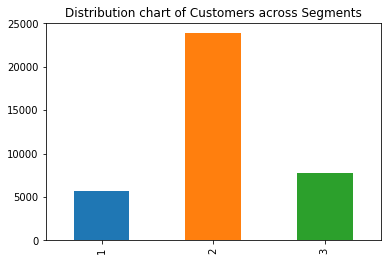

In [25]:
dAnalysisOH_scaled['segmentation_label'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of Customers across Segments')

# Data Modeling

### Lets now setup the basic SVM classifier

In [16]:
import itertools
def analyze(clf, data, classLabel):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    cnf_matrix = metrics.confusion_matrix(data['test']['y'], predicted)
    
    print("Confusion matrix:\n%s" %  metrics.confusion_matrix(data['test']['y'], predicted))
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= classLabel, title='Confusion matrix, without normalization')

    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model

The training to test set ratio will be set to 70% to 30%

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
testSize = 0.3
dAnalysisOH_scaled = dAnalysisOH
dAnalysisOH_scaled['gross_income'] = preprocessing.scale(dAnalysisOH_scaled['gross_income'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH_scaled, dAnalysisOH_scaled.segmentation_label, test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

segmentationClasses = ['03 - UNIVERSITARIO', '02 - PARTICULARES', '01 - TOP']

data = {'train': {'X': X_train,
                          'y': y_train},
                'test': {'X': X_test,
                         'y': y_test}}

(26171, 51) (26171,)
(11217, 51) (11217,)


### Create the models

In [19]:
# One vs All
ovrLin = LinearSVC(C=100,multi_class='ovr', penalty='l2',class_weight=None, random_state=8)

# One vs One - RBF kernel
ovoRBF = OneVsRestClassifier( SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=200, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))

# One vs One - Polynomial kernel
ovoPoly = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
    max_iter=200, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
ovrLin.fit(X_train,y_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=8, tol=0.0001,
     verbose=0)

In [22]:
ovoRBF.fit(X_train,y_train)
ovoPoly.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=200, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Lets look at the confusion matrix for One vs All SVM

Confusion matrix:
[[ 575 1091    0]
 [   1 7227    1]
 [   1    0 2321]]
Accuracy: 0.9025
Confusion matrix, without normalization


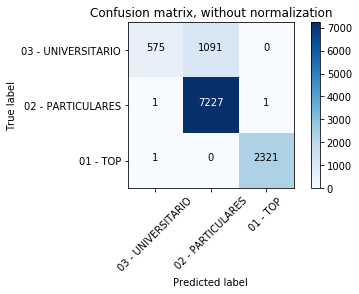

In [26]:
analyze(ovrLin,data, segmentationClasses)

### SVM One vs One using RBF kernel

Confusion matrix:
[[1663    3    0]
 [ 522 6707    0]
 [   1    0 2321]]
Accuracy: 0.9531
Confusion matrix, without normalization


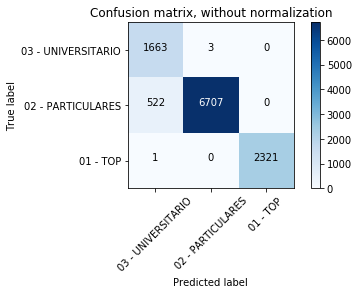

In [27]:
analyze(ovoRBF,data, segmentationClasses)

### SVM One vs One using Polynomial kernel

Confusion matrix:
[[1594   54   18]
 [   0 4243 2986]
 [   0    4 2318]]
Accuracy: 0.7270
Confusion matrix, without normalization


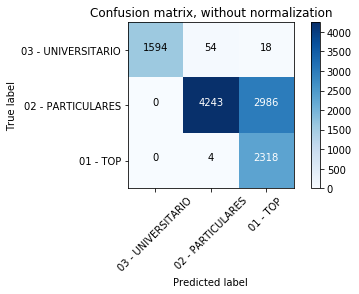

In [28]:
analyze(ovoPoly,data, segmentationClasses)

Based on the confusion matrix it looks like the SVM with RBF kernel is the best performing model. 

## ii) Looking at what products customers are likely to hold

### Count the number of loan accounts each customer holds

In [30]:
dAnalysisOH_scaled['loans'] = dAnalysisOH_scaled.apply(lambda row: row.Mortgage + row.credit_Card + row.direct_Debit  + row.Taxes, axis=1)

### Count the number of investments accounts each customer holds

In [31]:
dAnalysisOH_scaled['investments'] = dAnalysisOH_scaled.apply(lambda row: row.derivative_account + row.securities, axis=1)

### Count the number of savings account each customer holds

In [32]:
dAnalysisOH_scaled['savings'] = dAnalysisOH_scaled.apply (lambda row: row.payroll_Account
                                              + row.junior_Account + row.joint_account + row.individual_Account 
                                              + row.individual_Plus + row.short_term + row.medium_term + row.long_term 
                                              + row.e_account + row.Funds + row.Pensions 
                                              + row.payroll + row.Pensions_2   , axis=1)

### Data Understanding of accounts held by the customer
#### Savings accounts

Number of customers with Savings Account
 0.0    23380
1.0    10719
2.0     1274
3.0     1691
4.0      294
5.0       30
Name: savings, dtype: int64


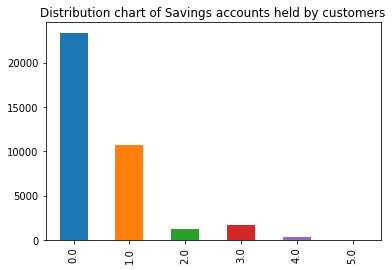

In [33]:
dAnalysisOH_scaled['savings'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of Savings accounts held by customers')
print("Number of customers with Savings Account\n", dAnalysisOH_scaled['savings'].value_counts().sort_index())

#### Create a column to indicate if a customer has savings accounts or not. 0: No savings account, 1: Has savings accounts

In [34]:
dAnalysisOH_scaled['savings_N'] = dAnalysisOH_scaled['savings']
dAnalysisOH_scaled['savings_N'] = dAnalysisOH_scaled['savings'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH_scaled['savings_N'].value_counts().sort_index()

0    23380
1    14008
Name: savings_N, dtype: int64

#### Current Account

Number of customers with Current Account
 0     8498
1    28890
Name: current_Accounts, dtype: int64


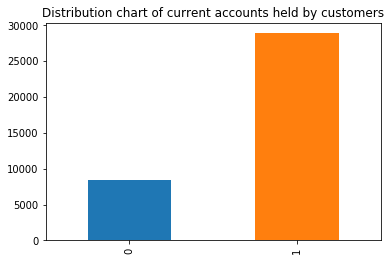

In [35]:
dAnalysisOH_scaled['current_Accounts'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of current accounts held by customers')
print("Number of customers with Current Account\n", dAnalysisOH_scaled['current_Accounts'].value_counts().sort_index())

#### Loan Accounts

Number of customers with Loan Account
 0    31291
1     5738
2      334
3       25
Name: loans, dtype: int64


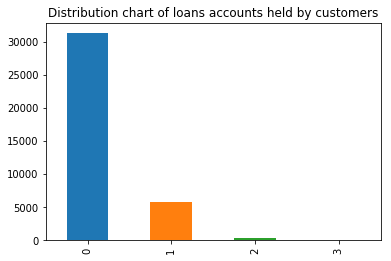

In [36]:
dAnalysisOH_scaled['loans'].value_counts().plot(kind='bar', title='Distribution chart of loans accounts held by customers')
print("Number of customers with Loan Account\n", dAnalysisOH_scaled['loans'].value_counts().sort_index())

#### Create a column to indicate if a customer has Loan accounts or not. 0: No loan account, 1: Has loan accounts

In [37]:
dAnalysisOH_scaled['loans_N'] = dAnalysisOH_scaled['loans']
dAnalysisOH_scaled['loans_N'] = dAnalysisOH_scaled['loans'].apply(lambda x: 1 if x > 0 else 0)
dAnalysisOH_scaled['loans_N'].value_counts().sort_index()

0    31291
1     6097
Name: loans_N, dtype: int64

#### Investments

Number of customers with investment Account
 0    37188
1      200
Name: investments, dtype: int64


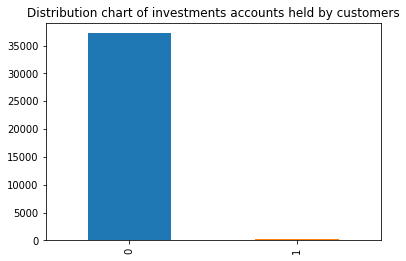

In [38]:
dAnalysisOH_scaled['investments'].value_counts().plot(kind='bar', title='Distribution chart of investments accounts held by customers')
print("Number of customers with investment Account\n", dAnalysisOH_scaled['investments'].value_counts().sort_index())

### As the dataset is imbalanced there is alot less investment accounts as compared to Savings, Loans and Current Account , under sampling will be performed 
We want to keep all the accounts which are for investments and it will represent 5% of the entire dataset. Therefore we should have 200 / 0.05 = 4000 records in total

In [39]:
investment_index = dAnalysisOH_scaled[dAnalysisOH_scaled.investments== 0].index
investmentSample = dAnalysisOH_scaled.loc[investment_index]
investmentSample.shape

(37188, 56)

We will randomly select other observations

In [40]:
sample_size = 3800
random_indices = np.random.choice(investment_index, sample_size, replace=False)
otherSample = dAnalysisOH_scaled.loc[random_indices]
otherSample.shape

(3800, 56)

In [41]:
underSample = pd.concat( [otherSample,dAnalysisOH_scaled[dAnalysisOH_scaled.investments== 1]], ignore_index = True)
underSample.shape

(4000, 56)

In [42]:
# Proportion of accounts in the undersampled dataset
underSample[['savings_N', 'investments','loans_N','current_Accounts']].sum()

savings_N           1493
investments          200
loans_N              693
current_Accounts    3118
dtype: int64

### Create the class labels

In [43]:
dAnalysisOH_scaled = underSample
dAccountsType = dAnalysisOH_scaled.groupby(['savings_N','investments','loans_N','current_Accounts']).count()
dAnalysisOH_scaled['account_label'] = dAnalysisOH_scaled.apply(lambda row: row.savings_N * 8 + row.investments * 4 + row.loans_N * 2 + row.current_Accounts, axis=1 )
dAnalysisOH_scaled['account_label'].value_counts().sort_index()
dAnalysisOH_scaled = dAnalysisOH_scaled.drop(['savings','savings_N','investments','loans','loans_N','current_Accounts'], axis=1)

In [44]:
dAnalysisOH_scaled['account_label'].unique()

array([ 1,  3,  8, 10,  9, 11,  2,  7,  5, 15, 13,  4, 14, 12], dtype=int64)

### Create a different test and training set of data based on the new target variable

In [45]:
X_train, X_test, y_train, y_test = train_test_split(dAnalysisOH_scaled, dAnalysisOH_scaled.account_label, test_size= testSize)
dataAccount = {'train': {'X': X_train,
                          'y': y_train},
                'test': {'X': X_test,
                         'y': y_test}}
accountLabels = ['C1',  'C2',  'C3',  'C4', 'C5', 'C7',  'C8',  'C9', 'C10', 'C11',  'C12', 'C13', 'C14', 'C15']

In [46]:
ovrLin.fit(X_train,y_train) #Fit to the LinearSVC model
ovoRBF.fit(X_train,y_train)
ovoPoly.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=200, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confusion matrix for one vs all SVM 

Confusion matrix:
[[593   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 123   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3  27   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   9   0   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0  93   0   0   0   0   0   0   0]
 [  0   0   0 119   0   0   0  31   0   2   0   0   0   0]
 [  0   0   0  11   0   0   1   0  22   4   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0   0   0   0   0]]
Accuracy: 0.7550
Confusion matrix, without normalization


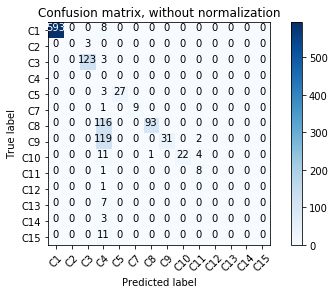

In [47]:
analyze(ovrLin,dataAccount, accountLabels)

### Confusion matrix for One vs One SVM RBF kernal

Confusion matrix:
[[600   0   0   0   0   1   0   0   0   0   0   0   0]
 [  2   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0 125   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0  27   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   5   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0 204   5   0   0   0   0   0   0]
 [  0   0   0   0   0   7 145   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4  34   0   0   0   0   0]
 [  0   0   0   0   0   0   4   3   2   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   2   0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   7]]
Accuracy: 0.9650
Confusion matrix, without normalization


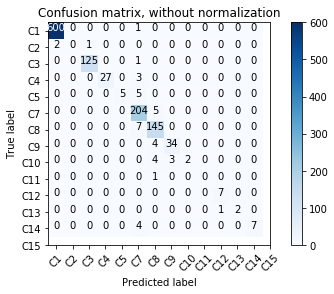

In [48]:
analyze(ovoRBF,dataAccount, accountLabels)

In [49]:
### Confusion matrix for One vs One SVM Polynomial kernal

Confusion matrix:
[[472 129   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57  69   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5  17   7   0   1   0   0   0   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0   0   0   0]
 [ 21   0   3   0  15  41  40  89   0   0   0   0   0]
 [  0   0   0   0   1  27  41  59  24   0   0   0   0]
 [  0   0   0   0   0   0   3  35   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   7]]
Accuracy: 0.5942
Confusion matrix, without normalization


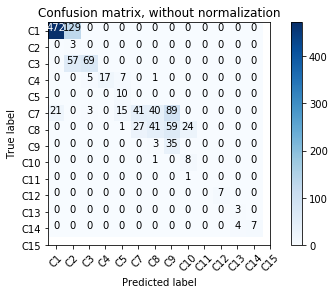

In [50]:
analyze(ovoPoly,dataAccount, accountLabels)

Based on the confusion matrix it looks like the SVM with RBF kernel is the best performing model for identifying the accounts which a customer will hold. 